<h2>The ultimate max GRAPHIC generator 2000 explosion.<h3>

In [1]:
import pandas as pd
import numpy as np

#importando banco de dado sobre reprovados.
Quatitativo_reprovacao = pd.read_excel('aprovacao_PRO.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_GEO.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_MEC.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_ARQ.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_AMB.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_CAT.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_MET.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_CIV.xlt',sep=';', encoding='latin-1')
Quatitativo_reprovacao = pd.read_excel('aprovacao_MIN.xlt',sep=';', encoding='latin-1')

Quatitativo_reprovacao.head()

#Gerando colunas necessárias para a graficação.
Quatitativo_reprovacao['CONTADOR'] = 1
Quatitativo_reprovacao['REPROVADOS'] = Quatitativo_reprovacao['MATRICULAS']- Quatitativo_reprovacao['APROVACOES']
Quatitativo_reprovacao['TAXA_REPROVACAO'] = round(Quatitativo_reprovacao['REPROVADOS']/ (Quatitativo_reprovacao['MATRICULAS']),2)
Quatitativo_reprovacao['ANO/SEMESTRE'] = Quatitativo_reprovacao.apply(lambda Quatitativo_reprovacao:'%s.%s' % (Quatitativo_reprovacao['ANO'],Quatitativo_reprovacao['SEMESTRE']),axis=1)

#retirando anos indesejados.
Quatitativo_reprovacao = Quatitativo_reprovacao[Quatitativo_reprovacao['ANO'] != 2020]
Quatitativo_reprovacao = Quatitativo_reprovacao.drop([7055,7056])

In [10]:
Quatitativo_reprovacao[Quatitativo_reprovacao['DISCIPLINA'] == 'PRO309']

,ANO,SEMESTRE,DISCIPLINA,DESCRICAO,TURMA,APROVACOES,MATRICULAS,REPROVACOES FALTA,REPROVACOES NOTA,REPROVACOES NOTA FALTA,TRANCAMENTOS,CONTADOR,REPROVADOS,TAXA_REPROVACAO,ANO/SEMESTRE
4688,2013,2.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,27.0,31.0,0.0,1.0,0.0,3.0,1,4.0,0.13,2013.2.0
4848,2014,1.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,31.0,39.0,0.0,3.0,3.0,2.0,1,8.0,0.21,2014.1.0
5010,2014,2.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,29.0,37.0,0.0,1.0,0.0,7.0,1,8.0,0.22,2014.2.0
5191,2015,1.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,31.0,40.0,0.0,4.0,1.0,4.0,1,9.0,0.22,2015.1.0
5372,2015,2.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,18.0,34.0,0.0,2.0,3.0,11.0,1,16.0,0.47,2015.2.0
5562,2016,1.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,13.0,34.0,0.0,7.0,10.0,4.0,1,21.0,0.62,2016.1.0
5759,2016,2.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,18.0,33.0,0.0,5.0,5.0,5.0,1,15.0,0.45,2016.2.0
5929,2017,1.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,28.0,42.0,0.0,0.0,9.0,5.0,1,14.0,0.33,2017.1.0
6091,2017,2.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,19.0,37.0,0.0,5.0,8.0,5.0,1,18.0,0.49,2017.2.0
6265,2018,1.0,PRO309,METODOS ESTOCASTICOS DA ENGENHARIA I,11.0,25.0,42.0,0.0,10.0,5.0,2.0,1,17.0,0.40,2018.1.0


In [2]:
PRO = Quatitativo_reprovacao[Quatitativo_reprovacao.DISCIPLINA.str.contains('PRO',case=False)]

In [3]:
oi = PRO.groupby(['DISCIPLINA']).TAXA_REPROVACAO.describe()
oi = oi[oi['count'] > 10]
oi = pd.DataFrame(oi)
oi = oi.reset_index()
oi

,DISCIPLINA,count,mean,std,min,25%,50%,75%,max
0,PRO101,15.0,0.098667,0.065342,0.00,0.0500,0.100,0.1550,0.22
1,PRO106,13.0,0.148462,0.069743,0.03,0.1100,0.140,0.2000,0.26
2,PRO126,25.0,0.167200,0.081727,0.00,0.1000,0.190,0.2300,0.27
3,PRO131,21.0,0.433333,0.384829,0.00,0.0000,0.470,0.5800,1.00
4,PRO215,32.0,0.142187,0.143790,0.00,0.0400,0.100,0.2300,0.64
5,PRO216,12.0,0.056667,0.058205,0.00,0.0000,0.050,0.1025,0.15
6,PRO217,15.0,0.019333,0.035750,0.00,0.0000,0.000,0.0300,0.12
7,PRO219,15.0,0.084667,0.098769,0.00,0.0250,0.050,0.1250,0.33
8,PRO222,12.0,0.087500,0.082034,0.02,0.0275,0.050,0.1225,0.27
9,PRO224,31.0,0.070645,0.072890,0.00,0.0300,0.050,0.0950,0.33


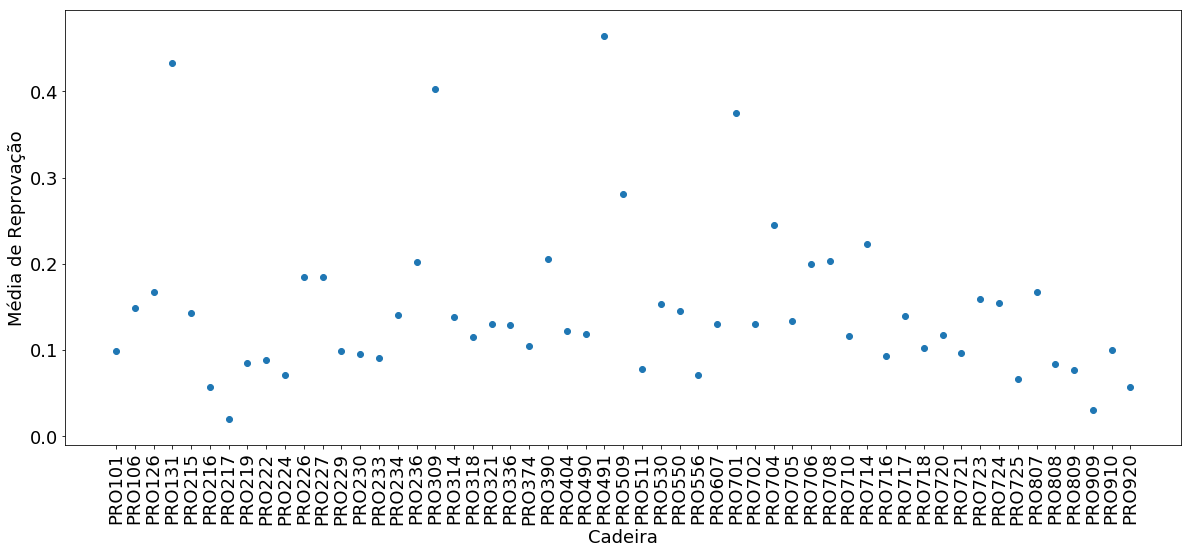

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(oi.iloc[:,0].values, oi.iloc[:,2].values)

plt.ylabel('Média de Reprovação',size = 18)
plt.xlabel('Cadeira',size = 18)

plt.xticks(size = 18,rotation=90)
plt.yticks(size = 18)

#plt.title(size = 22)
plt.show()

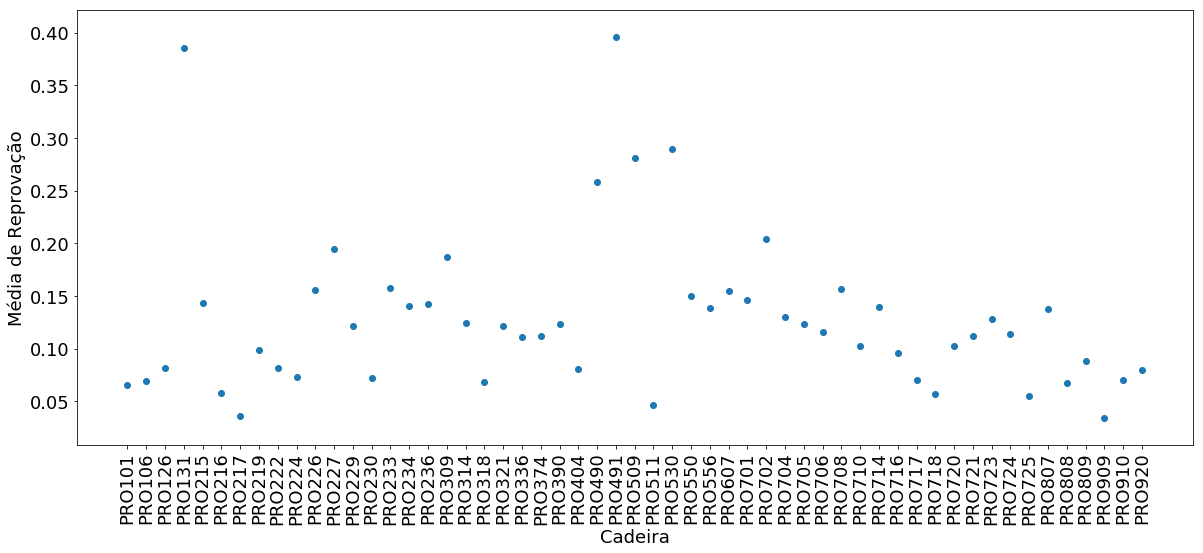

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.scatter(oi.iloc[:,0].values, oi.iloc[:,3].values)

plt.ylabel('Média de Reprovação',size = 18)
plt.xlabel('Cadeira',size = 18)

plt.xticks(size = 18,rotation=90)
plt.yticks(size = 18)

#plt.title(size = 22)
plt.show()

In [58]:
PRO.to_csv('Cadeiras_pro_reprovacao.csv')

In [59]:
PRO

,ANO,SEMESTRE,DISCIPLINA,DESCRICAO,TURMA,APROVACOES,MATRICULAS,REPROVACOES FALTA,REPROVACOES NOTA,REPROVACOES NOTA FALTA,TRANCAMENTOS,CONTADOR,REPROVADOS,TAXA_REPROVACAO,ANO/SEMESTRE
107,1998,1.0,PRO101,INTRODUCAO A ENGENHARIA DE PRODUCAO,11.0,32.0,38.0,0.0,0.0,6.0,0.0,1,6.0,0.16,1998.1.0
236,1998,2.0,PRO101,INTRODUCAO A ENGENHARIA DE PRODUCAO,11.0,7.0,9.0,0.0,0.0,2.0,0.0,1,2.0,0.22,1998.2.0
237,1998,2.0,PRO102,INTRODUCAO A METODOLOGIA DA PESQUISA,11.0,39.0,41.0,0.0,0.0,2.0,0.0,1,2.0,0.05,1998.2.0
368,1999,1.0,PRO101,INTRODUCAO A ENGENHARIA DE PRODUCAO,11.0,7.0,7.0,0.0,0.0,0.0,0.0,1,0.0,0.00,1999.1.0
369,1999,1.0,PRO101,INTRODUCAO A ENGENHARIA DE PRODUCAO,21.0,40.0,47.0,0.0,0.0,7.0,0.0,1,7.0,0.15,1999.1.0
370,1999,1.0,PRO102,INTRODUCAO A METODOLOGIA DA PESQUISA,11.0,13.0,15.0,0.0,0.0,2.0,0.0,1,2.0,0.13,1999.1.0
371,1999,1.0,PRO230,ENGENHARIA DE METODOS,11.0,35.0,45.0,0.0,9.0,1.0,0.0,1,10.0,0.22,1999.1.0
372,1999,1.0,PRO302,ACOES EMPREENDEDORAS,11.0,2.0,2.0,0.0,0.0,0.0,0.0,1,0.0,0.00,1999.1.0
537,1999,2.0,PRO102,INTRODUCAO A METODOLOGIA DA PESQUISA,11.0,36.0,39.0,0.0,0.0,3.0,0.0,1,3.0,0.08,1999.2.0
538,1999,2.0,PRO231,ENGENHARIA DO TRABALHO,11.0,30.0,37.0,0.0,5.0,0.0,2.0,1,7.0,0.19,1999.2.0
